In [1]:
# prompt: so we need to draw gaf of 4 individual classes of neurological disorder so we need to first have 4 individual csv files, like i have the 4 csv files in the content part so first you just import all necessery things then we will plot gaf one by one

!pip install pyts
!pip install pandas

import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import pandas as pd

# Assuming your CSV files are named class1.csv, class2.csv, class3.csv, class4.csv
# and are located in the /content/ directory.
csv_files = ['/content/HC_gait.csv', '/content/CA_gait.csv', '/content/HSP_gait.csv', '/content/PD_gait.csv']

# We will load the data from each CSV and store them in a list.
data = []
for file in csv_files:
    df = pd.read_csv(file)
    # Assuming the time series data is in a column named 'value' or the first column
    # You might need to adjust this based on your actual CSV file structure.
    data.append(df.iloc[:, 0].values)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.4 MB/s eta 0:00:00


In [3]:
# 1. Import necessary libraries
!pip install pyts pandas matplotlib numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import os # Import os to check file existence

# 2. Specify the path to your CSV file
# !!! IMPORTANT: Replace '/path/to/your/file.csv' with the actual path to your file !!!
csv_file_path = '/content/CA_gait.csv' # Example: '/content/HC_gait.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    print(f"Error: File not found at {csv_file_path}")
else:
    try:
        # 3. Load the CSV file
        df = pd.read_csv(csv_file_path)

        # 4. Extract the time series data from the first column and ensure it's numeric
        # Adjust column index [0] if your time series data is in a different column
        time_series_data = pd.to_numeric(df.iloc[:, 0], errors='coerce').values

        # Remove any potential NaN values introduced by coercion
        time_series_data = time_series_data[~np.isnan(time_series_data)]

        # Ensure the time series is not empty after removing NaNs
        if time_series_data.size == 0:
            print(f"Error: No valid numeric data found in the first column of {csv_file_path}")
        else:
            # 5. Define the function to create GAF components (reusing our previous logic)
            def create_gaf_rgb(time_series_data):
                """
                Creates GAF images (GADF, GASF, Fi component) from a time series for RGB representation.

                Args:
                    time_series_data (np.ndarray): A single time series as a NumPy array.

                Returns:
                    tuple: A tuple containing the GADF, GASF, and Fi component as NumPy arrays.
                """
                # Reshape the time series to be in the format (n_samples, n_timestamps) for pyts
                time_series_reshaped = time_series_data.reshape(1, -1)

                # Initialize Gramian Angular Field transformers with the desired method
                transformer_gadf = GramianAngularField(method='difference')
                transformer_gasf = GramianAngularField(method='summation')

                # Compute GADF
                gadf = transformer_gadf.fit_transform(time_series_reshaped)

                # Compute GASF
                gasf = transformer_gasf.fit_transform(time_series_reshaped)

                # Compute Fi component (Can be approximated as the original time series normalized to [-1, 1])
                min_val = time_series_data.min()
                max_val = time_series_data.max()

                 # Handle case where min_val and max_val are the same to avoid division by zero
                if max_val == min_val:
                    normalized_ts = np.zeros_like(time_series_data, dtype=float) # Ensure float type
                else:
                    normalized_ts = (time_series_data - min_val) / (max_val - min_val)

                # Normalize to [-1, 1]
                fi_component = 2 * normalized_ts - 1

                # Reshape Fi component to match the image dimensions
                # The GAF images are square, with dimensions equal to the length of the time series
                n_timestamps = time_series_data.shape[0]
                fi_component_reshaped = np.repeat(fi_component.reshape(1, -1, 1), n_timestamps, axis=1)


                # Since pyts outputs (n_samples, n_timestamps, n_timestamps), we take the first sample.
                return gadf[0], gasf[0], fi_component_reshaped[0]

            # 6. Create GAF components and stack them
            gadf_img, gasf_img, fi_img = create_gaf_rgb(time_series_data)

            # Ensure all images have the same dimensions before stacking
            # This is a safeguard, they should be (n_timestamps, n_timestamps)
            min_rows = min(gadf_img.shape[0], gasf_img.shape[0], fi_img.shape[0])
            min_cols = min(gadf_img.shape[1], gasf_img.shape[1], fi_img.shape[1])

            gadf_img = gadf_img[:min_rows, :min_cols]
            gasf_img = gasf_img[:min_rows, :min_cols]
            fi_img = fi_img[:min_rows, :min_cols]


            # Stack the images to create an RGB-like representation
            # Each channel is one of the GAF components
            # Note: The values in GAFs are typically between -1 and 1.
            # For plotting with imshow, it's often better to scale them to 0-1 or 0-255
            # We'll scale to 0-1 for simplicity in stacking, as imshow can handle float [0,1] or [-1,1]

            # Scale GADF and GASF from [-1, 1] to [0, 1] for consistent scaling
            gadf_scaled = (gadf_img + 1) / 2
            gasf_scaled = (gasf_img + 1) / 2
            # Fi component is already [-1, 1], scale it as well
            fi_scaled = (fi_img + 1) / 2


            # Stack the scaled images
            rgb_image = np.stack([gadf_scaled, gasf_scaled, fi_scaled], axis=-1)


            # 7. Plot the RGB GAF image
            plt.figure(figsize=(8, 8))
            # Use origin='lower' to match the typical time series representation if desired
            # extent=[0, time_series_data.shape[0], 0, time_series_data.shape[0]] can add axis labels based on timestamps
            plt.imshow(rgb_image, origin='lower', cmap='viridis') # viridis is just a placeholder cmap, RGB image doesn't use it this way
            plt.title(f'Gramian Angular Field (RGB) for {os.path.basename(csv_file_path)}')
            plt.xlabel('Time Stamp Index')
            plt.ylabel('Time Stamp Index')
            plt.colorbar(label='Scaled Value (0-1)')
            plt.show()

    except Exception as e:
        print(f"An error occurred during processing: {e}")

Error: No valid numeric data found in the first column of /content/CA_gait.csv


In [30]:
import pandas as pd

# Load the CSV data
file_path = 'CA_gait.csv'
df = pd.read_csv(file_path)

# Calculate derived features for each row
def derive_gait_features(row):
    cadence = row['Cadence (n°step/min)']
    left_stride_interval = right_stride_interval = elapsed_time = (60 / cadence) * 2

    # Swing and stance intervals in seconds
    left_swing_interval_sec = left_stride_interval * row['L Swing (%)'] / 100
    right_swing_interval_sec = right_stride_interval * row['R Swing (%)'] / 100
    left_stance_interval_sec = left_stride_interval * row['L Stance (%)'] / 100
    right_stance_interval_sec = right_stride_interval * row['R Stance (%)'] / 100

    # Double support (average of L and R)
    double_support_percent = (row['L Double Supp. (%)'] + row['R Double Supp. (%)']) / 2
    double_support_interval_sec = left_stride_interval * double_support_percent / 100

    return pd.Series({
        'Elapsed Time (sec)': elapsed_time,
        'Left Stride Interval (sec)': left_stride_interval,
        'Right Stride Interval (sec)': right_stride_interval,
        'Left Swing Interval (sec)': left_swing_interval_sec,
        'Right Swing Interval (sec)': right_swing_interval_sec,
        'Left Swing Interval (% of stride)': row['L Swing (%)'],
        'Right Swing Interval (% of stride)': row['R Swing (%)'],
        'Left Stance Interval (sec)': left_stance_interval_sec,
        'Right Stance Interval (sec)': right_stance_interval_sec,
        'Left Stance Interval (% of stride)': row['L Stance (%)'],
        'Right Stance Interval (% of stride)': row['R Stance (%)'],
        'Double Support Interval (sec)': double_support_interval_sec,
        'Double Support Interval (% of stride)': double_support_percent
    })

# Apply the function to each row
derived_df = df.apply(derive_gait_features, axis=1)

# Optionally, join with SUBJECT_ID for reference
derived_df = pd.concat([df[['SUBJECT_ID']], derived_df], axis=1)

# Save to CSV
output_file_path = 'derived_gait_features_CA.csv'
derived_df.to_csv(output_file_path, index=False)

print(f"Derived features saved to {output_file_path}")

Derived features saved to derived_gait_features_CA.csv


In [31]:

features_full = {
    "L_Stride": "Left Stride Interval (sec)",
    "R_Stride": "Right Stride Interval (sec)",
    "L_Swing": "Left Swing Interval (sec)",
    "R_Swing": "Right Swing Interval (sec)",
    "L_SwingPct": "Left Swing Interval (% of stride)",
    "R_SwingPct": "Right Swing Interval (% of stride)",
    "L_Stance": "Left Stance Interval (sec)",
    "R_Stance": "Right Stance Interval (sec)",
    "L_StancePct": "Left Stance Interval (% of stride)",
    "R_StancePct": "Right Stance Interval (% of stride)",
    "Double_Support": "Double Support Interval (sec)",
    "Double_SupportPct": "Double Support Interval (% of stride)",
    "Elapsed_Time": "Elapsed Time (sec)"
}



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your derived features
derived_df = pd.read_csv("derived_gait_features_CA.csv")

# Parameters for synthetic data
n_points = 100
time_values = np.linspace(0, 300, n_points)

data_dict = {}

for _, row in derived_df.iterrows():
    subject_id = row['SUBJECT_ID']
    synthetic_df = pd.DataFrame({'Time': time_values})

    for key, original_col in features_full.items():
        base_val = row[original_col]
        fluctuations = 0.05 * np.sin(np.linspace(0, 4 * np.pi, n_points))  # smooth sine wave
        noise = np.random.normal(0, 0.005, n_points)  # small random noise
        synthetic_df[key] = base_val + fluctuations + noise

    data_dict[subject_id] = {"time_series": synthetic_df}

print("✅ Synthetic time series created for all 13 attributes.")


✅ Synthetic time series created for all 13 attributes.


In [33]:
def plot_all_features(subject_id):
    ts_data = data_dict[subject_id]["time_series"]
    plt.figure(figsize=(16, 20))
    plt.suptitle(f"Gait Features over Time for Subject {subject_id}", fontsize=18, y=1.02)

    for i, (key, label) in enumerate(features_full.items(), 1):
        plt.subplot(7, 2, i)
        plt.plot(ts_data["Time"], ts_data[key], label=label, color=plt.cm.tab20(i))
        plt.xlabel("Time (s)")
        plt.ylabel(label)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()

    plt.subplots_adjust(hspace=0.6)
    plt.show()



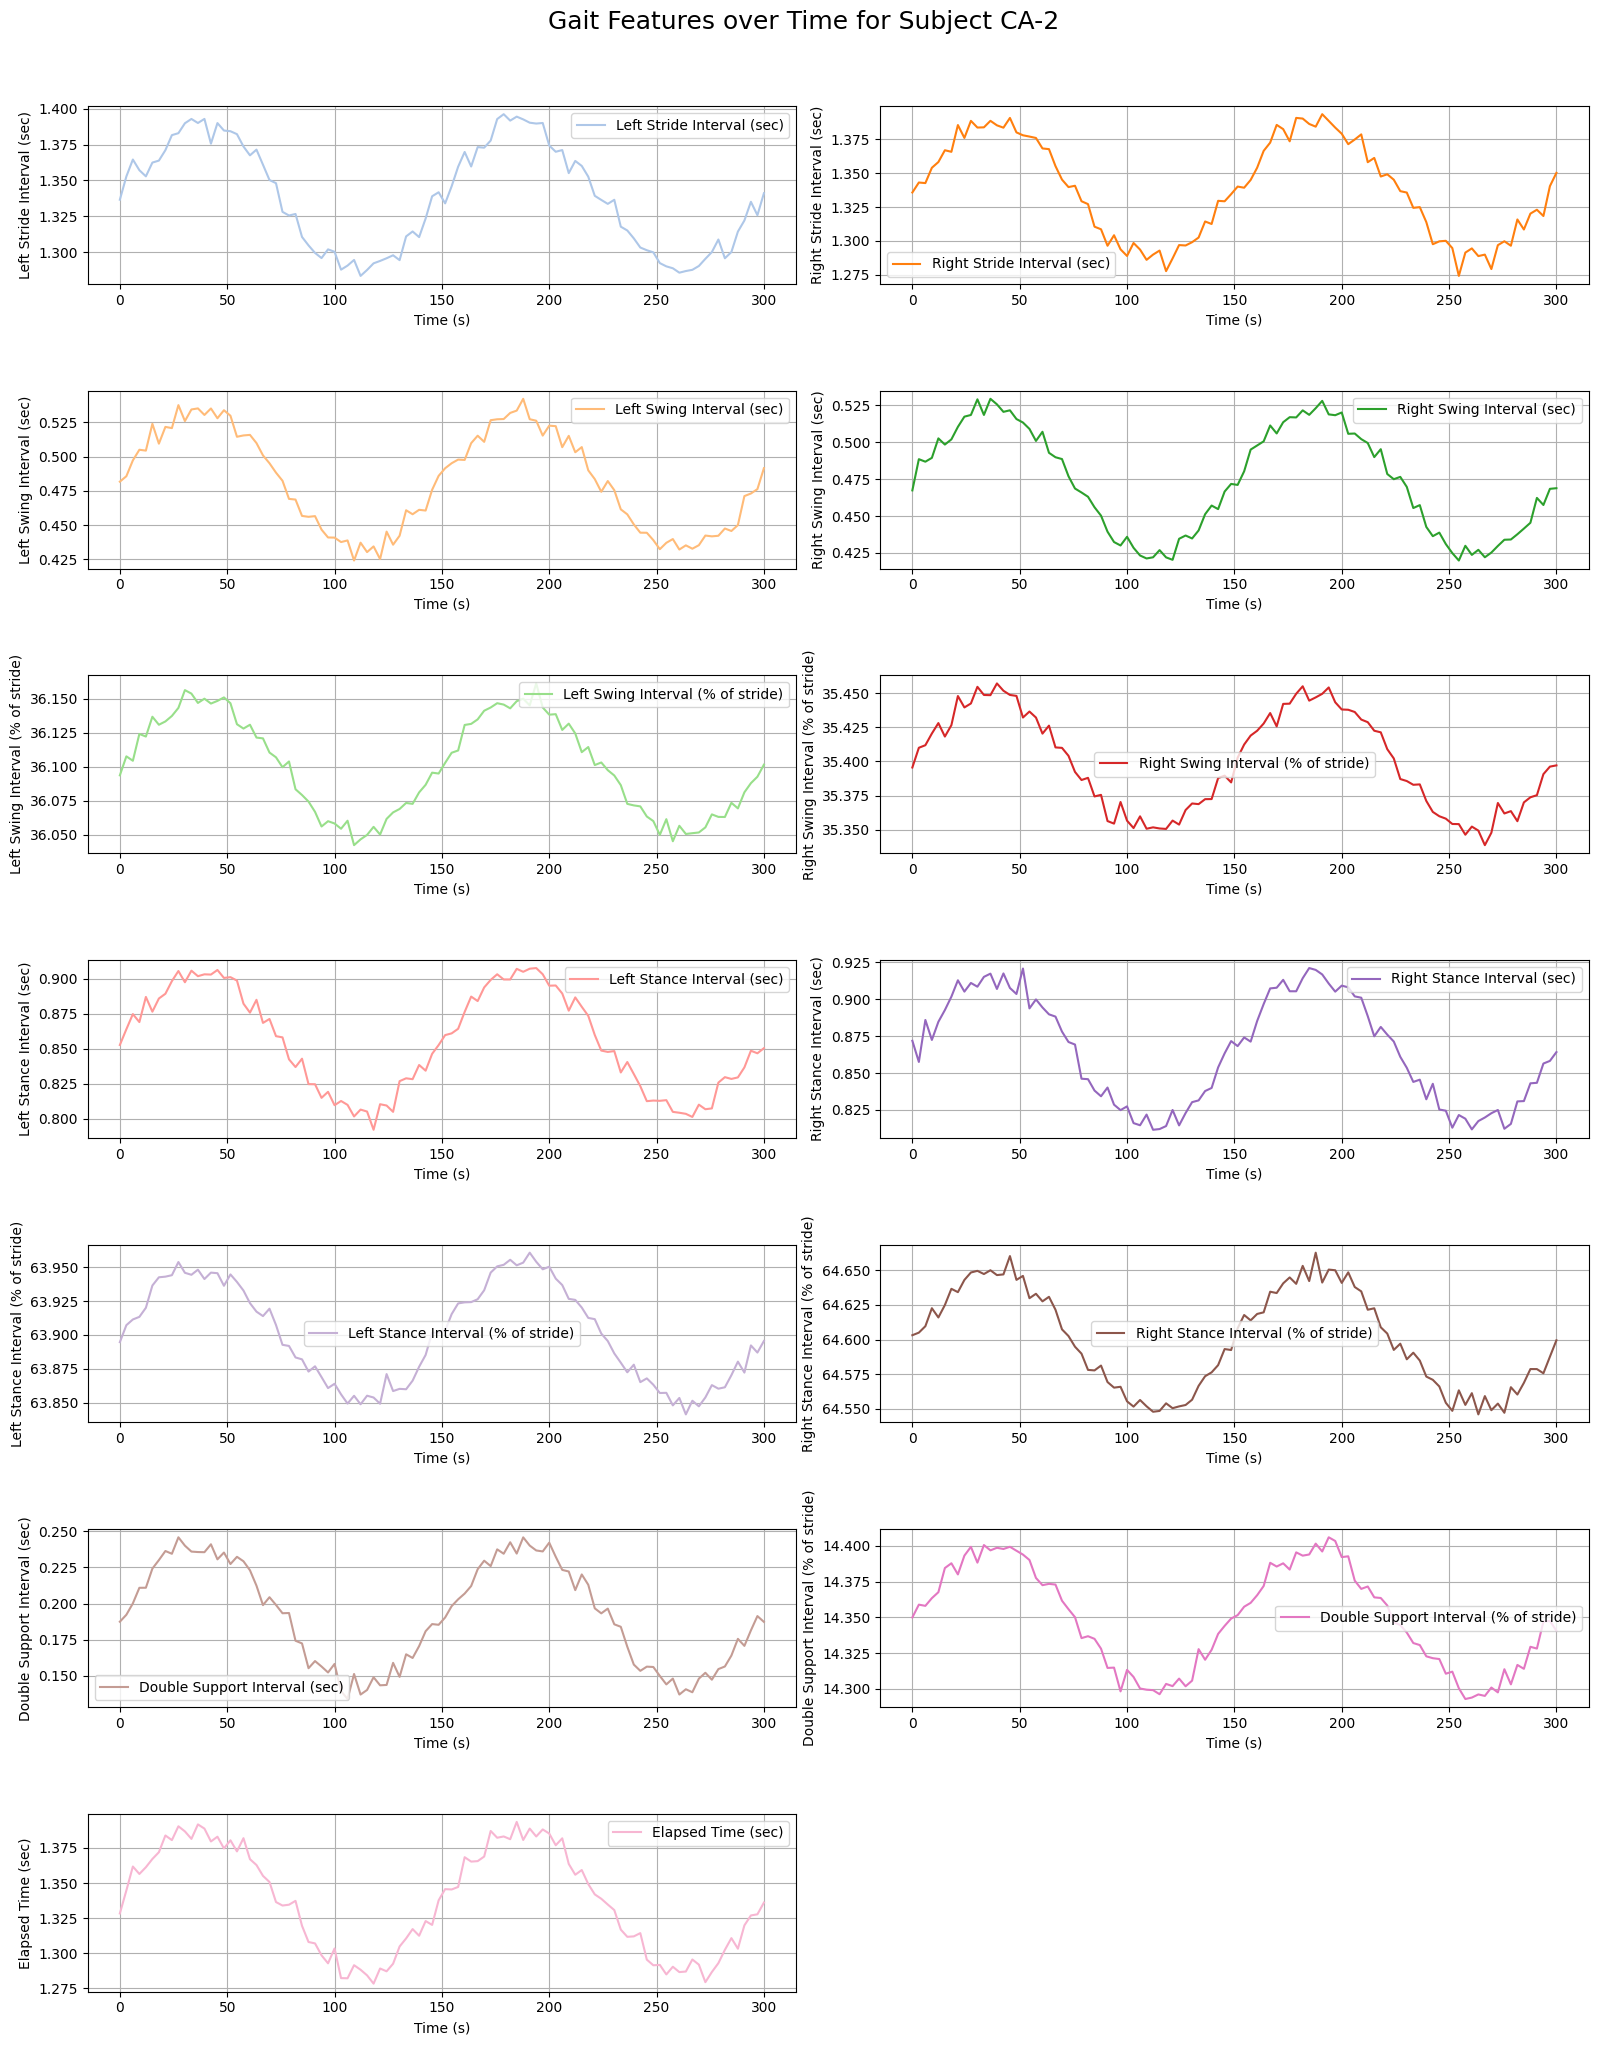

In [34]:
subject_id = list(data_dict.keys())[1]  # You can change index to 0, 2, etc.
plot_all_features(subject_id)


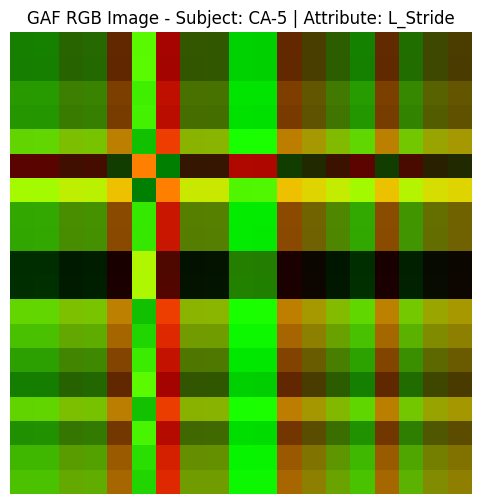

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def normalize_series(series):
    scaler = MinMaxScaler()
    return scaler.fit_transform(series.values.reshape(-1,1)).flatten()

def gaf_transform(series):
    # Normalize series to [-1,1] (required for arccos domain)
    min_val = np.min(series)
    max_val = np.max(series)
    scaled_series = 2 * (series - min_val) / (max_val - min_val) - 1
    scaled_series = np.clip(scaled_series, -1, 1)  # avoid numerical errors

    # Angular representation
    phi = np.arccos(scaled_series)  # shape (n,)

    # Compute Gramian Angular Summation Field (GASF)
    GASF = np.cos(phi[:, None] + phi[None, :])

    # Compute Gramian Angular Difference Field (GADF)
    GADF = np.sin(phi[:, None] - phi[None, :])

    return GASF, GADF, phi

def normalize_matrix(mat):
    # Normalize matrix to [0,1]
    min_val = np.min(mat)
    max_val = np.max(mat)
    return (mat - min_val) / (max_val - min_val)

def create_rgb_image(gasf, gadf):
    # Normalize GASF and GADF to [0,1]
    gasf_norm = normalize_matrix(gasf)
    gadf_norm = normalize_matrix(gadf)

    zeros = np.zeros_like(gasf_norm)

    # Stack into RGB image (shape: height x width x 3)
    rgb_img = np.stack((gasf_norm, gadf_norm, zeros), axis=-1)
    return rgb_img

def plot_rgb_image(rgb_img, title='GAF RGB Image'):
    plt.figure(figsize=(6,6))
    plt.imshow(rgb_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Usage example ---

# Load your CSV (replace 'your_gait_data.csv' with your file path)
df = pd.read_csv('derived_gait_features_CA.csv')
subject_id = df.iloc[4]['SUBJECT_ID']
# Select an attribute (example: 'L_Stride')
attribute = features_full['L_Stride']

# Normalize the attribute time series
series_norm = normalize_series(df[attribute])

# Compute GASF, GADF, phi
gasf, gadf, phi = gaf_transform(series_norm)

# Create RGB image
rgb_gaf_img = create_rgb_image(gasf, gadf)

# Visualize
plot_rgb_image(rgb_gaf_img, title=f'GAF RGB Image - Subject: {subject_id} | Attribute: {attribute_name}')

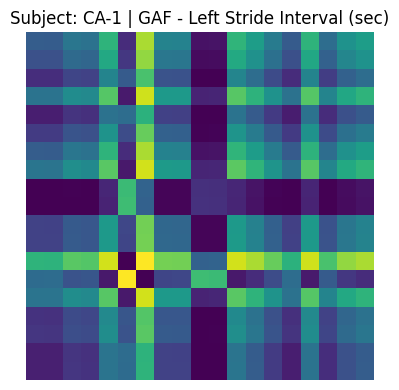

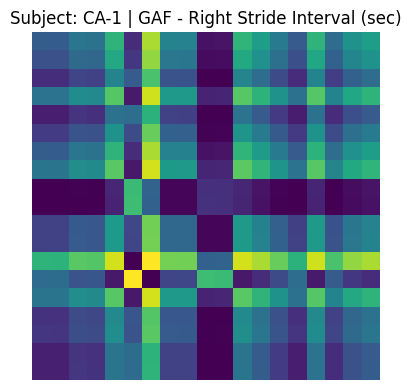

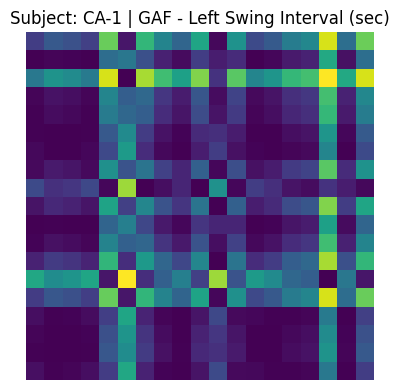

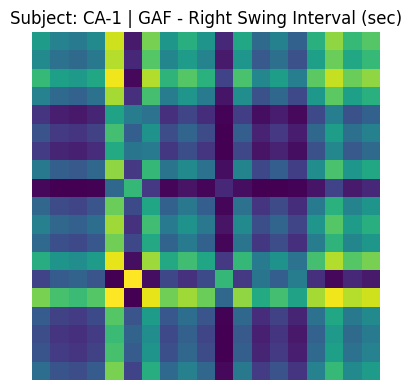

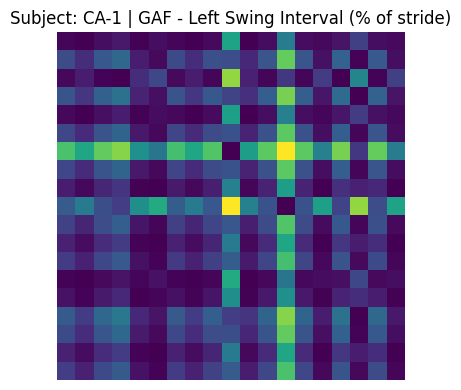

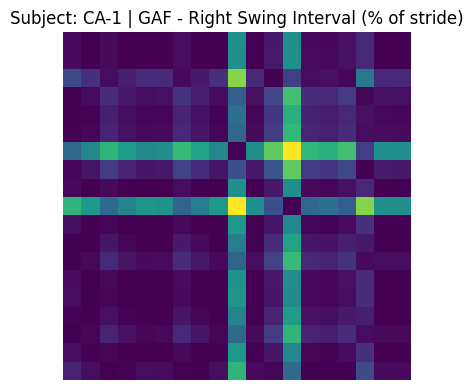

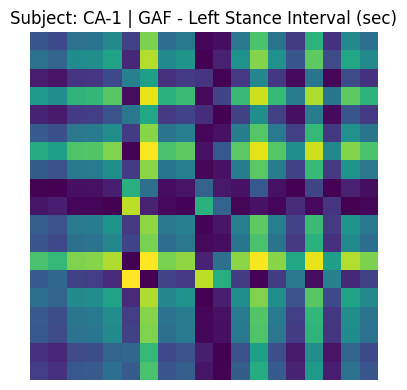

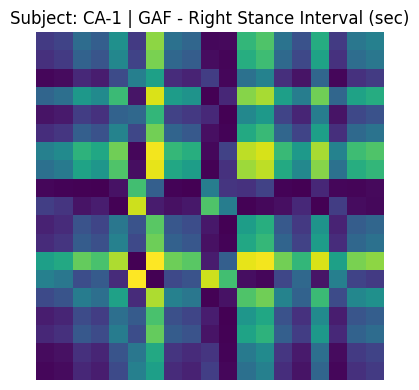

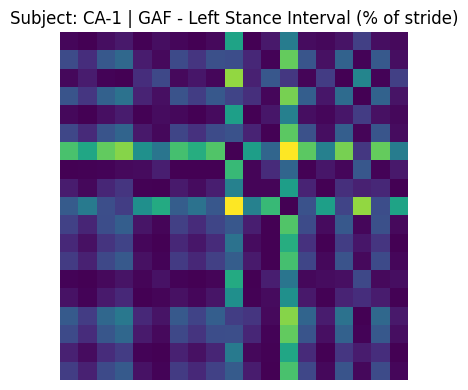

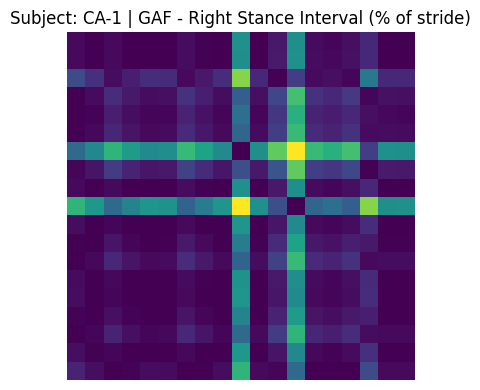

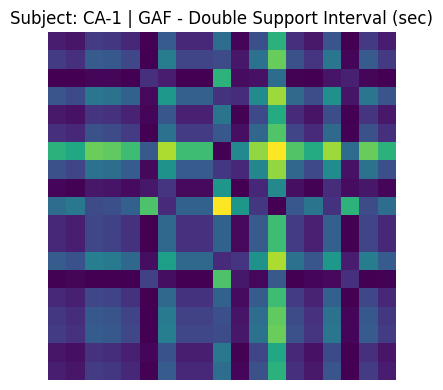

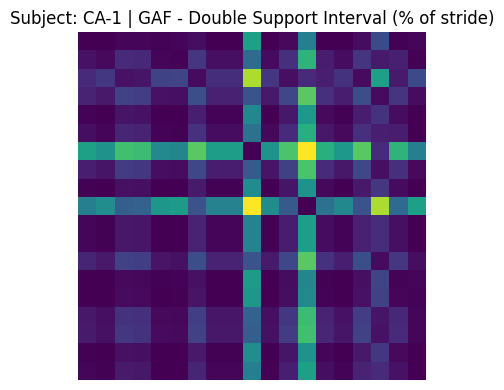

In [40]:
from pyts.image import GramianAngularField
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your CSV file
try:
    derived_df = pd.read_csv('derived_gait_features_CA.csv')
except FileNotFoundError:
    print("Error: 'derived_gait_features_CA.csv' not found.")
    exit()

# Get subject ID from first row (or update as needed)
subject_id = derived_df.iloc[0]['SUBJECT_ID'] if 'SUBJECT_ID' in derived_df.columns else 'Unknown'

# List of time-series gait features
features_to_use = [
    'Left Stride Interval (sec)',
    'Right Stride Interval (sec)',
    'Left Swing Interval (sec)',
    'Right Swing Interval (sec)',
    'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)',
    'Left Stance Interval (sec)',
    'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)',
    'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)',
    'Double Support Interval (% of stride)'
]

# Apply GAF for each feature
for feature in features_to_use:
    if feature not in derived_df.columns:
        print(f"Skipped {feature}: column not found in CSV")
        continue

    signal = derived_df[feature].dropna().values  # drop NaNs if any

    # Check for signal validity
    if signal.size < 2:
        print(f"Skipped {feature}: not enough data")
        continue

    if np.max(signal) == np.min(signal) or not np.isfinite(signal).all():
        print(f"Skipped {feature}: constant or invalid values")
        continue

    # Normalize signal to [-1, 1]
    signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
    signal_normalized = np.clip(signal_normalized, -1, 1)

    # Generate GAF
    gaf = GramianAngularField(method='summation')
    gaf_image = gaf.fit_transform([signal_normalized])[0]

    # Visualize GAF with subject ID
    plt.figure(figsize=(4, 4))
    plt.imshow(gaf_image, cmap='viridis', origin='lower')
    plt.title(f'Subject: {subject_id} | GAF - {feature}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [43]:
import pandas as pd

# Load the CSV data
file_path = 'HC_gait.csv'
df = pd.read_csv(file_path)

# Calculate derived features for each row
def derive_gait_features(row):
    cadence = row['Cadence (n°step/min)']
    left_stride_interval = right_stride_interval = elapsed_time = (60 / cadence) * 2

    # Swing and stance intervals in seconds
    left_swing_interval_sec = left_stride_interval * row['L Swing (%)'] / 100
    right_swing_interval_sec = right_stride_interval * row['R Swing (%)'] / 100
    left_stance_interval_sec = left_stride_interval * row['L Stance (%)'] / 100
    right_stance_interval_sec = right_stride_interval * row['R Stance (%)'] / 100

    # Double support (average of L and R)
    double_support_percent = (row['L Double Supp. (%)'] + row['R Double Supp. (%)']) / 2
    double_support_interval_sec = left_stride_interval * double_support_percent / 100

    return pd.Series({
        'Elapsed Time (sec)': elapsed_time,
        'Left Stride Interval (sec)': left_stride_interval,
        'Right Stride Interval (sec)': right_stride_interval,
        'Left Swing Interval (sec)': left_swing_interval_sec,
        'Right Swing Interval (sec)': right_swing_interval_sec,
        'Left Swing Interval (% of stride)': row['L Swing (%)'],
        'Right Swing Interval (% of stride)': row['R Swing (%)'],
        'Left Stance Interval (sec)': left_stance_interval_sec,
        'Right Stance Interval (sec)': right_stance_interval_sec,
        'Left Stance Interval (% of stride)': row['L Stance (%)'],
        'Right Stance Interval (% of stride)': row['R Stance (%)'],
        'Double Support Interval (sec)': double_support_interval_sec,
        'Double Support Interval (% of stride)': double_support_percent
    })

# Apply the function to each row
derived_df = df.apply(derive_gait_features, axis=1)

# Optionally, join with SUBJECT_ID for reference
derived_df = pd.concat([df[['SUBJECT_ID']], derived_df], axis=1)

# Save to CSV
output_file_path = 'derived_gait_features_HC.csv'
derived_df.to_csv(output_file_path, index=False)

print(f"Derived features saved to {output_file_path}")

Derived features saved to derived_gait_features_HC.csv


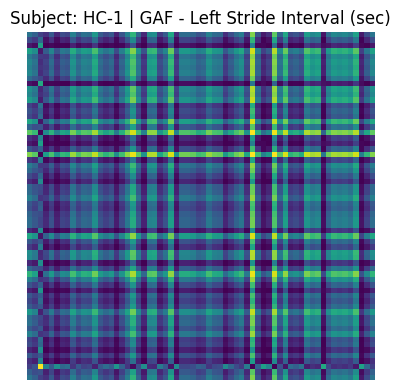

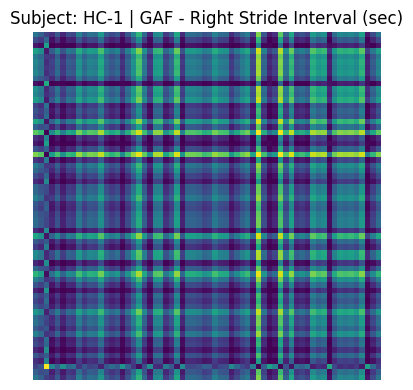

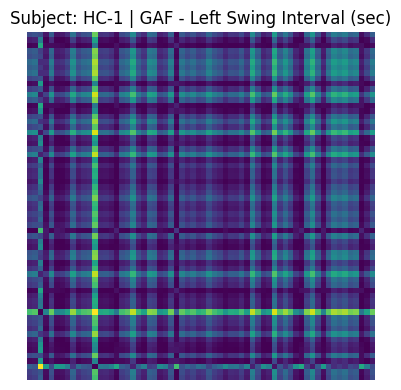

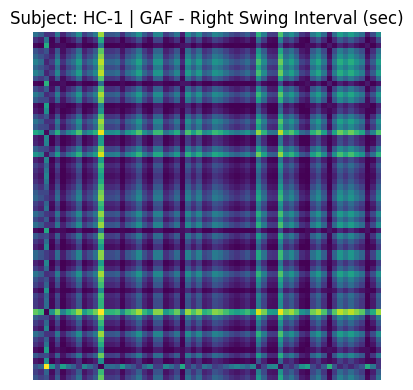

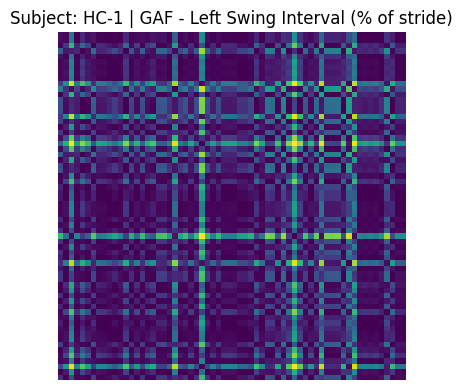

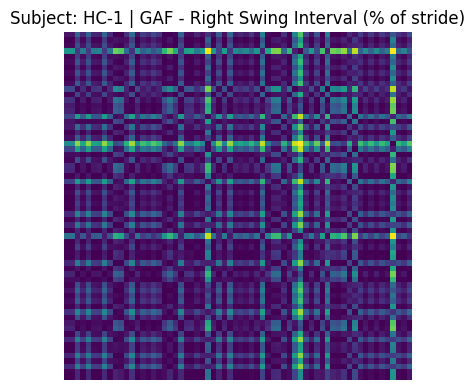

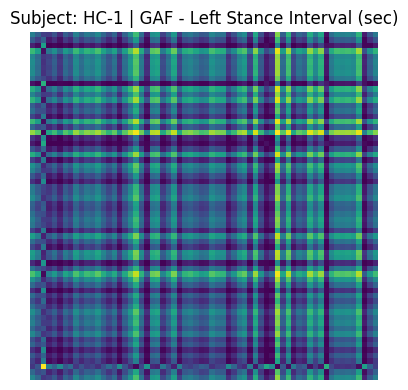

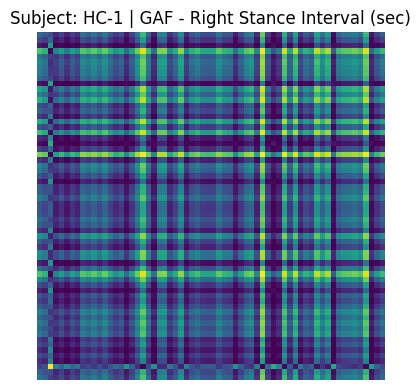

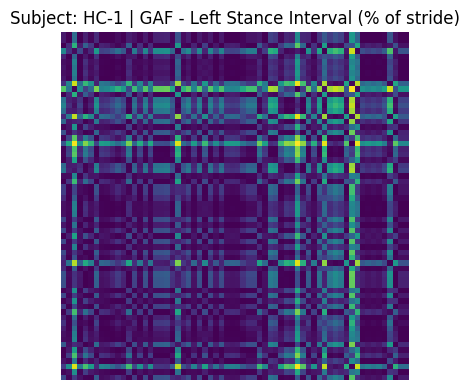

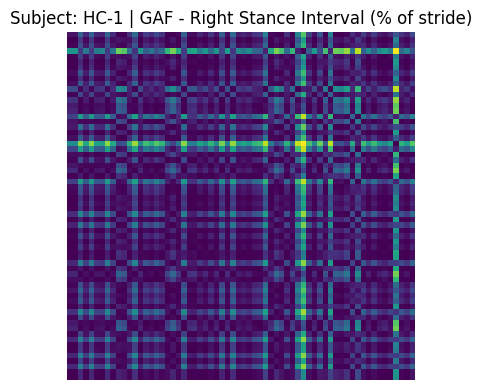

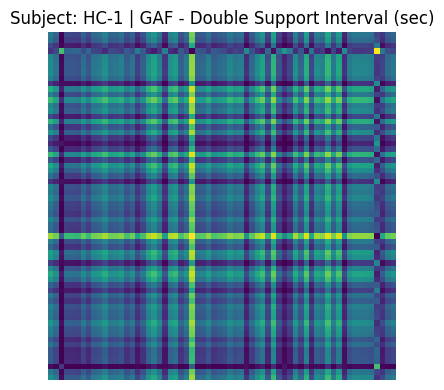

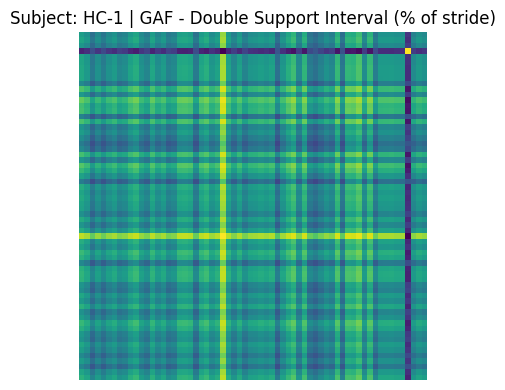

In [45]:
from pyts.image import GramianAngularField
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your CSV file
try:
    derived_df = pd.read_csv('derived_gait_features_HC.csv')
except FileNotFoundError:
    print("Error: 'derived_gait_features_HC.csv' not found.")
    exit()

# Get subject ID from first row (or update as needed)
subject_id = derived_df.iloc[0]['SUBJECT_ID'] if 'SUBJECT_ID' in derived_df.columns else 'Unknown'

# List of time-series gait features
features_to_use = [
    'Left Stride Interval (sec)',
    'Right Stride Interval (sec)',
    'Left Swing Interval (sec)',
    'Right Swing Interval (sec)',
    'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)',
    'Left Stance Interval (sec)',
    'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)',
    'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)',
    'Double Support Interval (% of stride)'
]

# Apply GAF for each feature
for feature in features_to_use:
    if feature not in derived_df.columns:
        print(f"Skipped {feature}: column not found in CSV")
        continue

    signal = derived_df[feature].dropna().values  # drop NaNs if any

    # Check for signal validity
    if signal.size < 2:
        print(f"Skipped {feature}: not enough data")
        continue

    if np.max(signal) == np.min(signal) or not np.isfinite(signal).all():
        print(f"Skipped {feature}: constant or invalid values")
        continue

    # Normalize signal to [-1, 1]
    signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
    signal_normalized = np.clip(signal_normalized, -1, 1)

    # Generate GAF
    gaf = GramianAngularField(method='summation')
    gaf_image = gaf.fit_transform([signal_normalized])[0]

    # Visualize GAF with subject ID
    plt.figure(figsize=(4, 4))
    plt.imshow(gaf_image, cmap='viridis', origin='lower')
    plt.title(f'Subject: {subject_id} | GAF - {feature}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [46]:
import pandas as pd

# Load the CSV data
file_path = 'PD_gait.csv'
df = pd.read_csv(file_path)

# Calculate derived features for each row
def derive_gait_features(row):
    cadence = row['Cadence (n°step/min)']
    left_stride_interval = right_stride_interval = elapsed_time = (60 / cadence) * 2

    # Swing and stance intervals in seconds
    left_swing_interval_sec = left_stride_interval * row['L Swing (%)'] / 100
    right_swing_interval_sec = right_stride_interval * row['R Swing (%)'] / 100
    left_stance_interval_sec = left_stride_interval * row['L Stance (%)'] / 100
    right_stance_interval_sec = right_stride_interval * row['R Stance (%)'] / 100

    # Double support (average of L and R)
    double_support_percent = (row['L Double Supp. (%)'] + row['R Double Supp. (%)']) / 2
    double_support_interval_sec = left_stride_interval * double_support_percent / 100

    return pd.Series({
        'Elapsed Time (sec)': elapsed_time,
        'Left Stride Interval (sec)': left_stride_interval,
        'Right Stride Interval (sec)': right_stride_interval,
        'Left Swing Interval (sec)': left_swing_interval_sec,
        'Right Swing Interval (sec)': right_swing_interval_sec,
        'Left Swing Interval (% of stride)': row['L Swing (%)'],
        'Right Swing Interval (% of stride)': row['R Swing (%)'],
        'Left Stance Interval (sec)': left_stance_interval_sec,
        'Right Stance Interval (sec)': right_stance_interval_sec,
        'Left Stance Interval (% of stride)': row['L Stance (%)'],
        'Right Stance Interval (% of stride)': row['R Stance (%)'],
        'Double Support Interval (sec)': double_support_interval_sec,
        'Double Support Interval (% of stride)': double_support_percent
    })

# Apply the function to each row
derived_df = df.apply(derive_gait_features, axis=1)

# Optionally, join with SUBJECT_ID for reference
derived_df = pd.concat([df[['SUBJECT_ID']], derived_df], axis=1)

# Save to CSV
output_file_path = 'derived_gait_features_PD.csv'
derived_df.to_csv(output_file_path, index=False)

print(f"Derived features saved to {output_file_path}")

Derived features saved to derived_gait_features_PD.csv


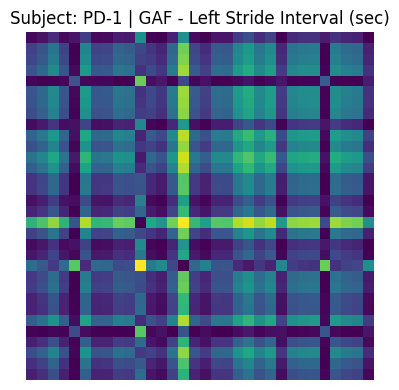

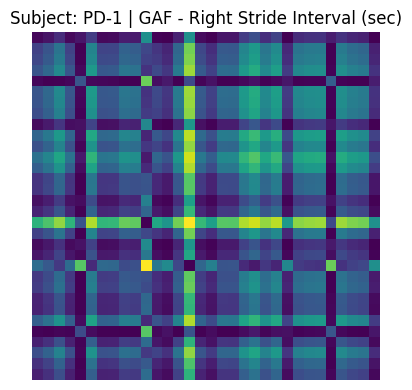

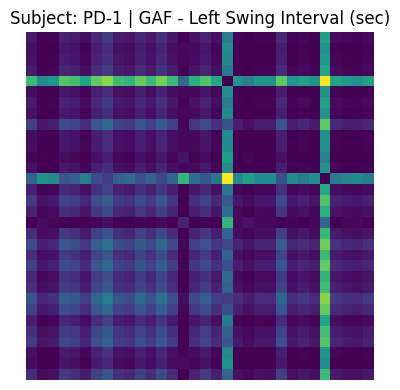

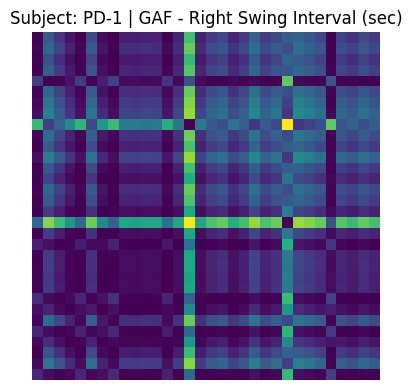

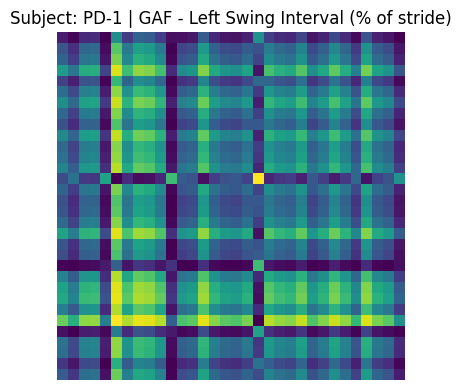

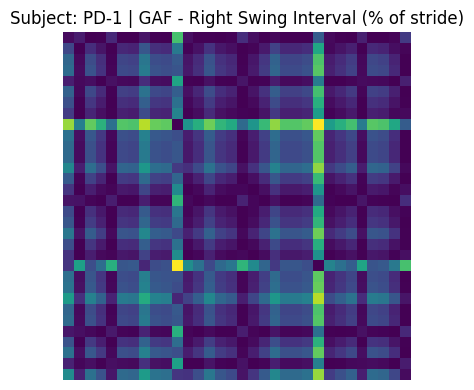

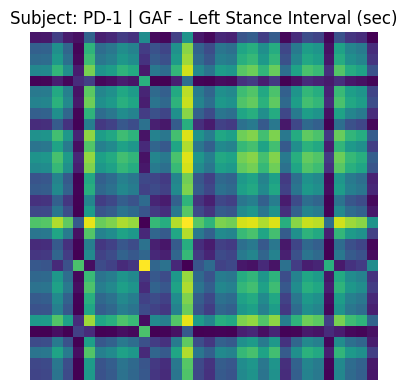

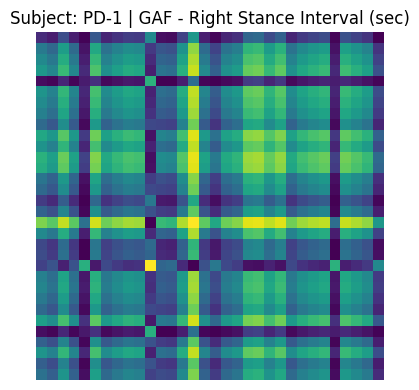

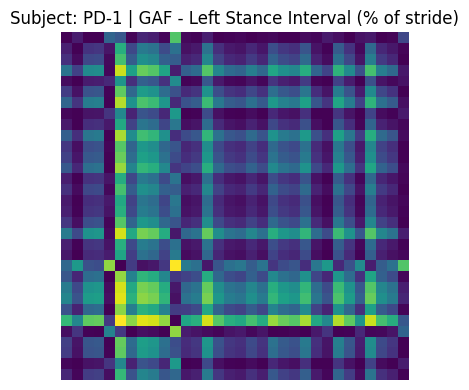

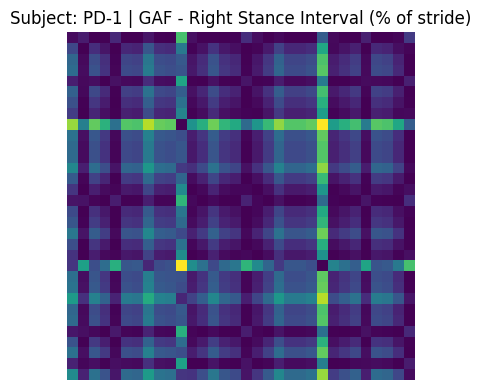

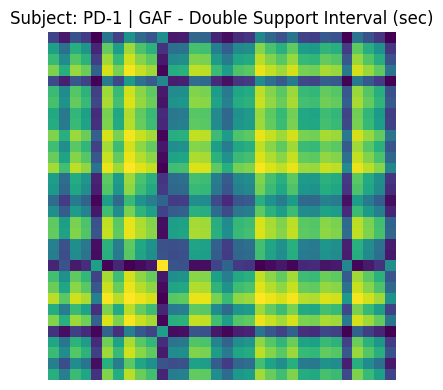

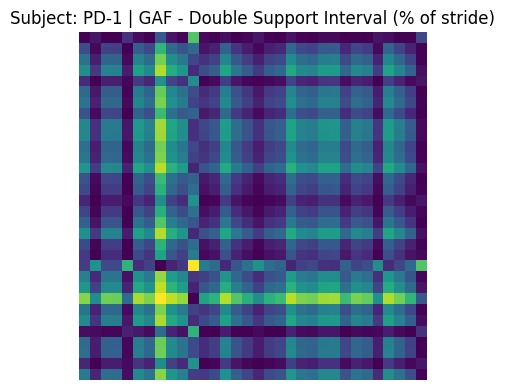

In [47]:
from pyts.image import GramianAngularField
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your CSV file
try:
    derived_df = pd.read_csv('derived_gait_features_PD.csv')
except FileNotFoundError:
    print("Error: 'derived_gait_features_PD.csv' not found.")
    exit()

# Get subject ID from first row (or update as needed)
subject_id = derived_df.iloc[0]['SUBJECT_ID'] if 'SUBJECT_ID' in derived_df.columns else 'Unknown'

# List of time-series gait features
features_to_use = [
    'Left Stride Interval (sec)',
    'Right Stride Interval (sec)',
    'Left Swing Interval (sec)',
    'Right Swing Interval (sec)',
    'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)',
    'Left Stance Interval (sec)',
    'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)',
    'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)',
    'Double Support Interval (% of stride)'
]

# Apply GAF for each feature
for feature in features_to_use:
    if feature not in derived_df.columns:
        print(f"Skipped {feature}: column not found in CSV")
        continue

    signal = derived_df[feature].dropna().values  # drop NaNs if any

    # Check for signal validity
    if signal.size < 2:
        print(f"Skipped {feature}: not enough data")
        continue

    if np.max(signal) == np.min(signal) or not np.isfinite(signal).all():
        print(f"Skipped {feature}: constant or invalid values")
        continue

    # Normalize signal to [-1, 1]
    signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
    signal_normalized = np.clip(signal_normalized, -1, 1)

    # Generate GAF
    gaf = GramianAngularField(method='summation')
    gaf_image = gaf.fit_transform([signal_normalized])[0]

    # Visualize GAF with subject ID
    plt.figure(figsize=(4, 4))
    plt.imshow(gaf_image, cmap='viridis', origin='lower')
    plt.title(f'Subject: {subject_id} | GAF - {feature}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [48]:
import pandas as pd

# Load the CSV data
file_path = 'HSP_gait.csv'
df = pd.read_csv(file_path)

# Calculate derived features for each row
def derive_gait_features(row):
    cadence = row['Cadence (n°step/min)']
    left_stride_interval = right_stride_interval = elapsed_time = (60 / cadence) * 2

    # Swing and stance intervals in seconds
    left_swing_interval_sec = left_stride_interval * row['L Swing (%)'] / 100
    right_swing_interval_sec = right_stride_interval * row['R Swing (%)'] / 100
    left_stance_interval_sec = left_stride_interval * row['L Stance (%)'] / 100
    right_stance_interval_sec = right_stride_interval * row['R Stance (%)'] / 100

    # Double support (average of L and R)
    double_support_percent = (row['L Double Supp. (%)'] + row['R Double Supp. (%)']) / 2
    double_support_interval_sec = left_stride_interval * double_support_percent / 100

    return pd.Series({
        'Elapsed Time (sec)': elapsed_time,
        'Left Stride Interval (sec)': left_stride_interval,
        'Right Stride Interval (sec)': right_stride_interval,
        'Left Swing Interval (sec)': left_swing_interval_sec,
        'Right Swing Interval (sec)': right_swing_interval_sec,
        'Left Swing Interval (% of stride)': row['L Swing (%)'],
        'Right Swing Interval (% of stride)': row['R Swing (%)'],
        'Left Stance Interval (sec)': left_stance_interval_sec,
        'Right Stance Interval (sec)': right_stance_interval_sec,
        'Left Stance Interval (% of stride)': row['L Stance (%)'],
        'Right Stance Interval (% of stride)': row['R Stance (%)'],
        'Double Support Interval (sec)': double_support_interval_sec,
        'Double Support Interval (% of stride)': double_support_percent
    })

# Apply the function to each row
derived_df = df.apply(derive_gait_features, axis=1)

# Optionally, join with SUBJECT_ID for reference
derived_df = pd.concat([df[['SUBJECT_ID']], derived_df], axis=1)

# Save to CSV
output_file_path = 'derived_gait_features_HSP.csv'
derived_df.to_csv(output_file_path, index=False)

print(f"Derived features saved to {output_file_path}")

Derived features saved to derived_gait_features_HSP.csv


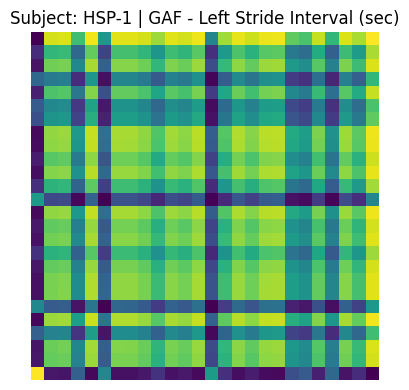

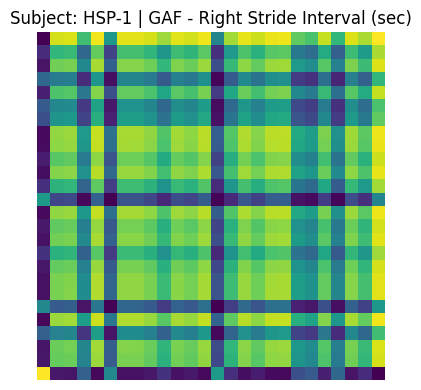

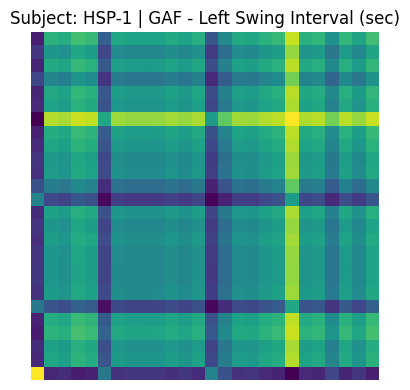

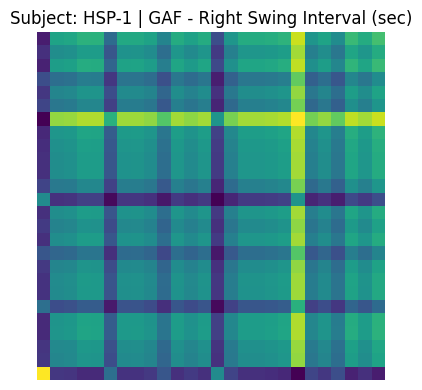

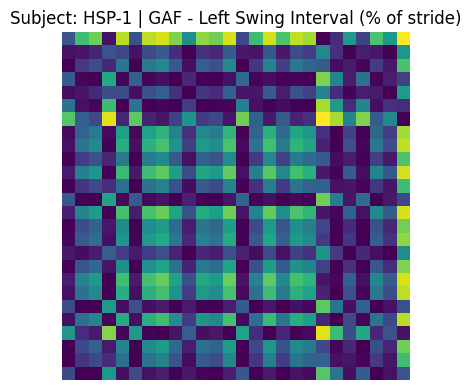

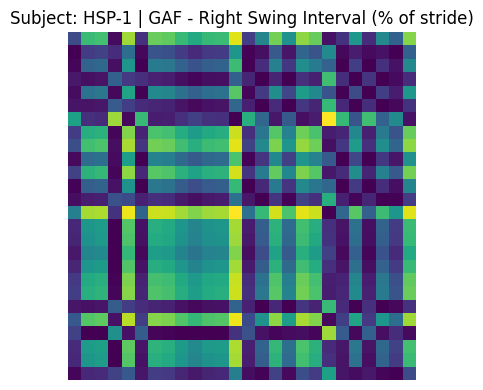

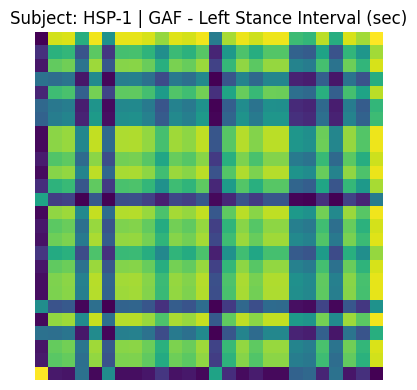

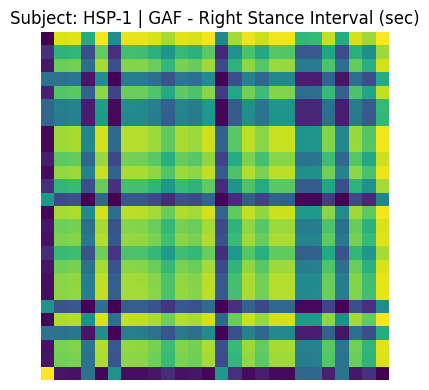

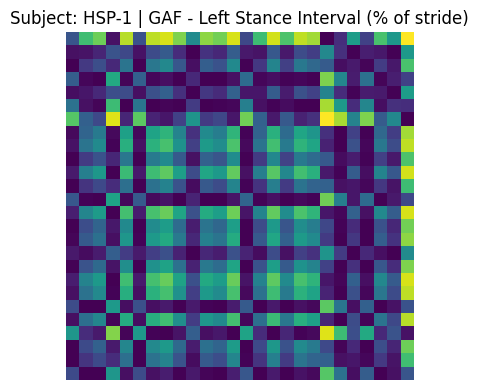

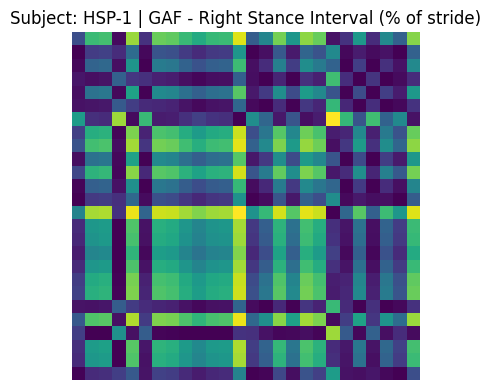

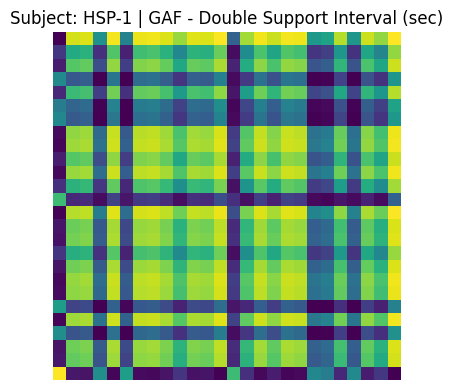

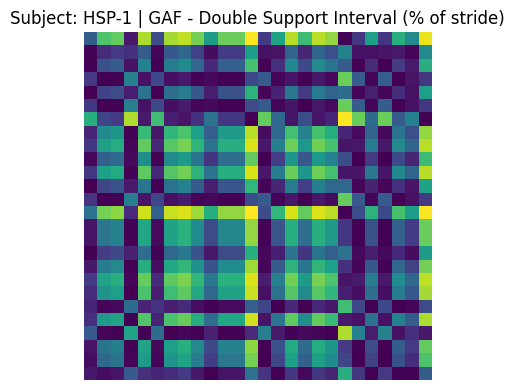

In [49]:
from pyts.image import GramianAngularField
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your CSV file
try:
    derived_df = pd.read_csv('derived_gait_features_HSP.csv')
except FileNotFoundError:
    print("Error: 'derived_gait_features_HSP.csv' not found.")
    exit()

# Get subject ID from first row (or update as needed)
subject_id = derived_df.iloc[0]['SUBJECT_ID'] if 'SUBJECT_ID' in derived_df.columns else 'Unknown'

# List of time-series gait features
features_to_use = [
    'Left Stride Interval (sec)',
    'Right Stride Interval (sec)',
    'Left Swing Interval (sec)',
    'Right Swing Interval (sec)',
    'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)',
    'Left Stance Interval (sec)',
    'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)',
    'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)',
    'Double Support Interval (% of stride)'
]

# Apply GAF for each feature
for feature in features_to_use:
    if feature not in derived_df.columns:
        print(f"Skipped {feature}: column not found in CSV")
        continue

    signal = derived_df[feature].dropna().values  # drop NaNs if any

    # Check for signal validity
    if signal.size < 2:
        print(f"Skipped {feature}: not enough data")
        continue

    if np.max(signal) == np.min(signal) or not np.isfinite(signal).all():
        print(f"Skipped {feature}: constant or invalid values")
        continue

    # Normalize signal to [-1, 1]
    signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
    signal_normalized = np.clip(signal_normalized, -1, 1)

    # Generate GAF
    gaf = GramianAngularField(method='summation')
    gaf_image = gaf.fit_transform([signal_normalized])[0]

    # Visualize GAF with subject ID
    plt.figure(figsize=(4, 4))
    plt.imshow(gaf_image, cmap='viridis', origin='lower')
    plt.title(f'Subject: {subject_id} | GAF - {feature}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
